### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

- Teach for India has approximately 900+ fellows who are deployed across 7 cities and are working with 28000 students. Many of these students do not have the reading and numeracy skills required at their grade level. The ability to predict employee performance will enable TFI to implement learning and development measures to empower their fellows to improve the reading levels of their students.
- Here, I will use Python to create an HR analytics tool that can help a talent management team to predict employee performance and plan for their growth.

In [59]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [60]:
#reading data into the df dataframe
df = pd.read_csv('Test_Data.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [61]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [62]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [63]:
education_value_counts=df['education'].value_counts()

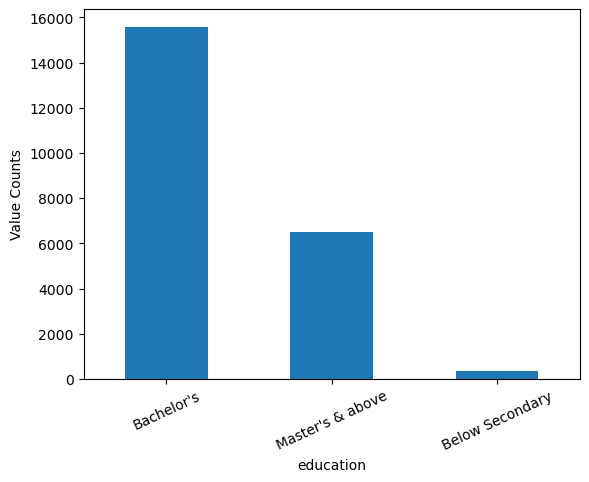

In [64]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

- The dataset likely represents TFI where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. 
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment.

- The dataset likely represents an organization or a sector where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. This could suggest that the roles in TFI do not necessarily require education beyond a Bachelor's degree, or that such qualifications are less common in the population represented.
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment in the roles included in the TFI. 

In [65]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'education')

To prevent data loss I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [66]:
new_education_value_counts = df['education'].value_counts()

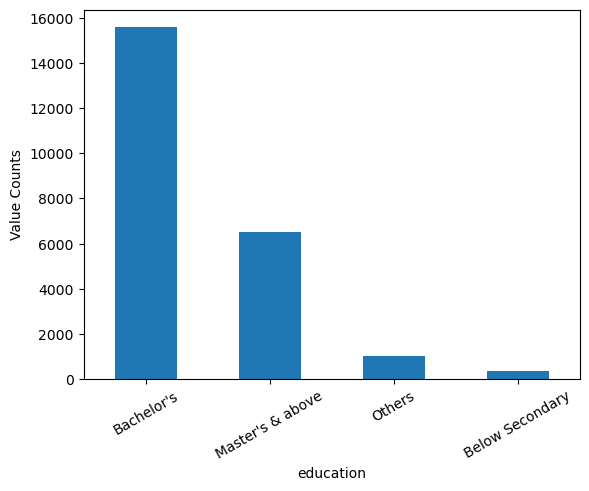

In [67]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [68]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['previous_year_rating'])

The missing data is not significant enough to bias the results.

In [69]:
rating_value_counts = df['previous_year_rating'].value_counts()

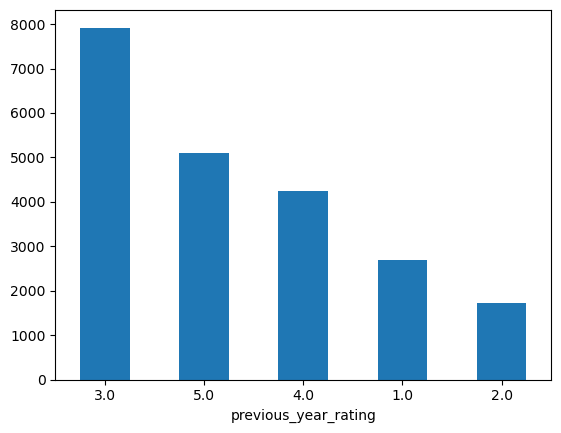

In [70]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [71]:
#making sure there are no more null values
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

In [72]:
df.rename(columns={'awards_won?':'awards_won'}, inplace=1)

/var/folders/_b/ygjd3hwd5wj6hwcczmfy35gh0000gn/T/ipykernel_7414/170088742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'awards_won?':'awards_won'}, inplace=1)


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMClassifier

# Assuming df is your DataFrame loaded from 'Test_data.csv'
# If you haven't loaded it yet, uncomment the next line and specify the correct path
# df = pd.read_csv('path/to/your/Test_data.csv')

# Correcting the target variable name and feature lists based on your input
target_variable = 'KPIs_met >80%'
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Prepare X and y
X = df[numeric_features + categorical_features]
y = df[target_variable]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the preprocessing and training pipeline with LightGBM classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LGBMClassifier())])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Example: Evaluate the model (you can add evaluation metrics as needed)
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940
Test Accuracy: 0.7237084870848709


In [75]:
import pickle

# Save the pipeline to a file
filename = 'employee_performance_prediction_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [77]:
# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

# Example input data (replace this with actual input data)
# This should be a dict or DataFrame containing the features for prediction
input_data = {
    'no_of_trainings': [2],
    'age': [28],
    'previous_year_rating': [5],
    'length_of_service': [31],
    'awards_won': [1],
    'avg_training_score': [95],
    'department': ['Sales'],
    'region': ['region_2'],
    'education': ['Master’s & above'],
    'gender': ['f'],
    'recruitment_channel': ['Sourcing']
}

# Convert the input data to a DataFrame or use it directly if already in DataFrame format
input_df = pd.DataFrame(input_data)

# Make a prediction with the loaded model
# (The model pipeline will handle the preprocessing steps)
prediction = loaded_model.predict(input_df)

# Output the result
print("Predicted Employee Performance:", prediction)

Predicted Employee Performance: [1]


### Variable 3: employee_work_department

In [92]:
department_value_counts = df['employee_work_department'].value_counts()

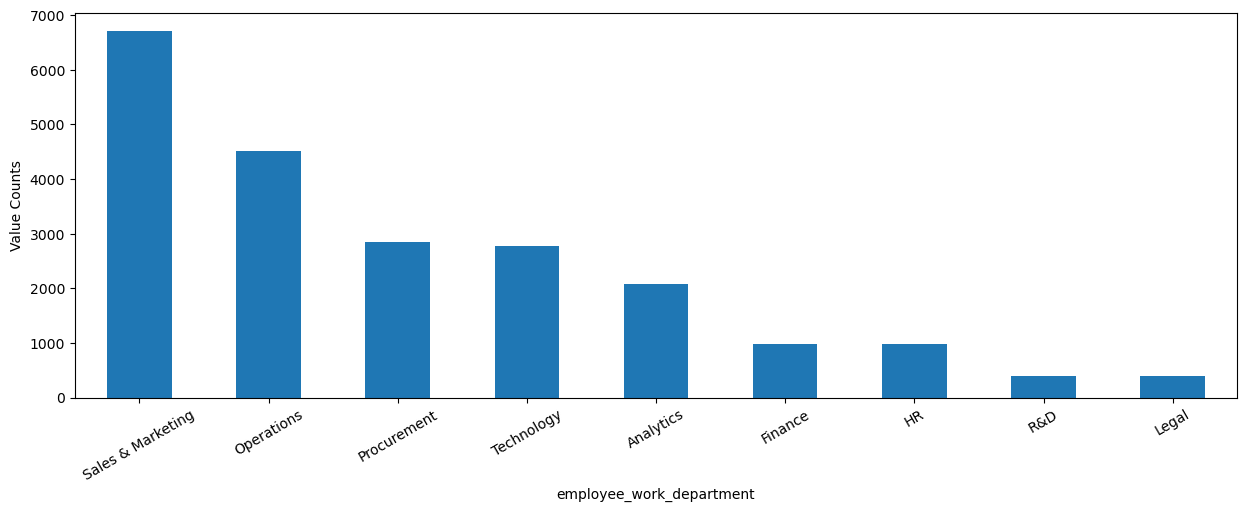

In [93]:
plt.figure(figsize=(15, 5))
department_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

- ' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
- The 'Operations' department follows as the second largest.
- 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
- 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.

- The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most personnel.
- The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
- Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

### Variable 4: employee_region

In [94]:
region_value_counts = df['employee_region'].value_counts()

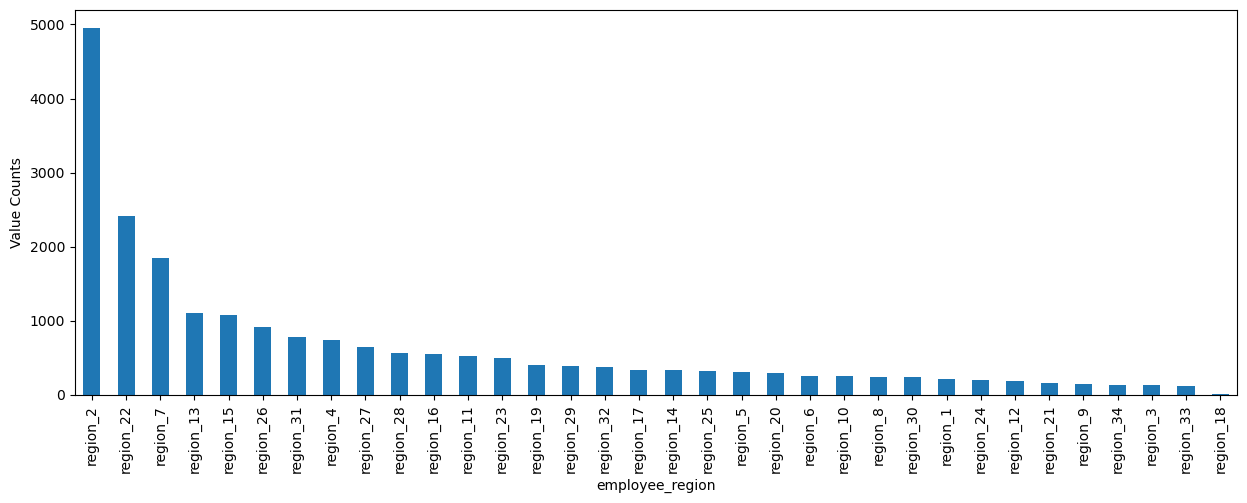

In [95]:
plt.figure(figsize=(15, 5))
region_value_counts.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

- The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
- The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
- The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.

- The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
- The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

### Variable 5: employee_gender

In [96]:
gender_value_counts = df['employee_gender'].value_counts()

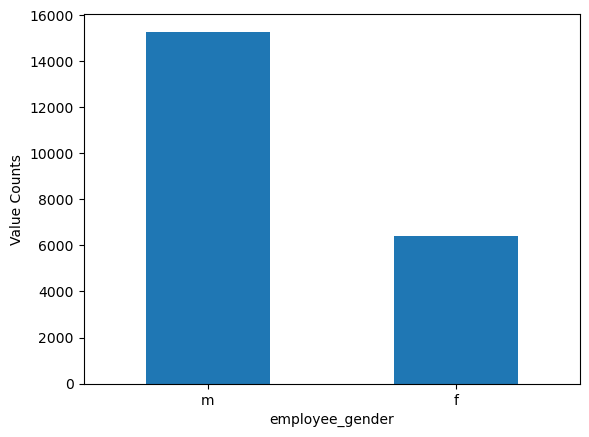

In [97]:
gender_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There are significantly more male employees ('m') than female employees ('f') in this dataset.
- The count of male employees exceeds 14000, while the count of female employees is just over 8000.

- There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

### Variable 6: employee_recruitment_channel

In [98]:
recruitment_value_counts = df['employee_recruitment_channel'].value_counts()

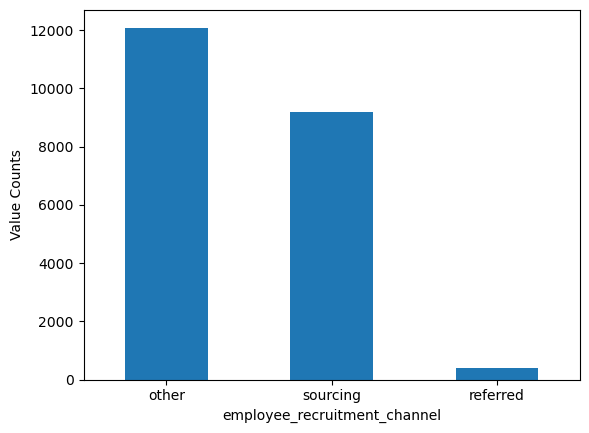

In [99]:
recruitment_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
- 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
- The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.

- The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include online job postings, career fairs, or direct applications to the company.

### Variable 7: no_of_trainings_of_employee

In [100]:
trainings_value_counts = df['no_of_trainings_of_employee'].value_counts()

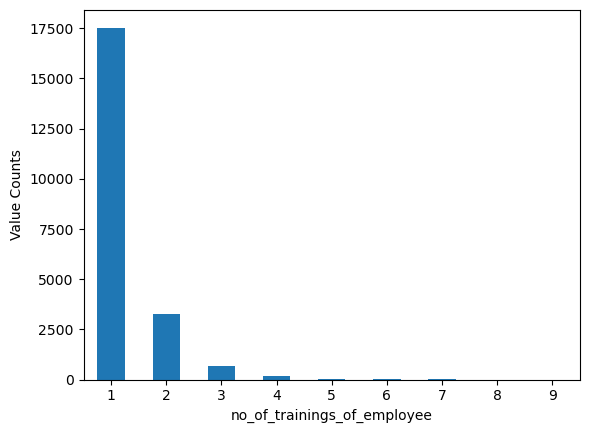

In [101]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
- There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have attended three.
- Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.

- The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

### Variable 8: employee_age

In [102]:
age_value_counts = df['employee_age'].value_counts()

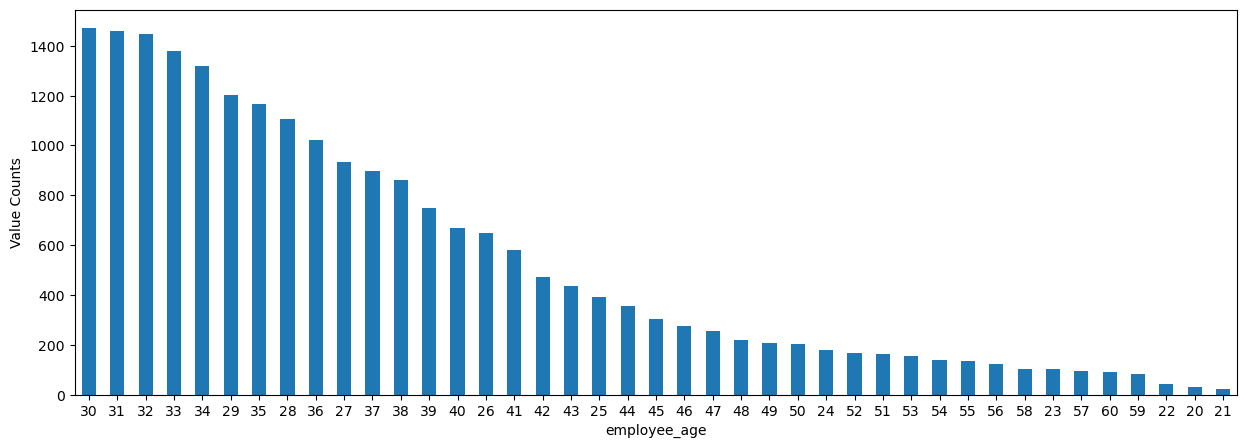

In [103]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
- The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
- There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
- The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.- 

### Variable 9: employee_length_of_service

In [104]:
service_value_counts = df['employee_length_of_service'].value_counts()

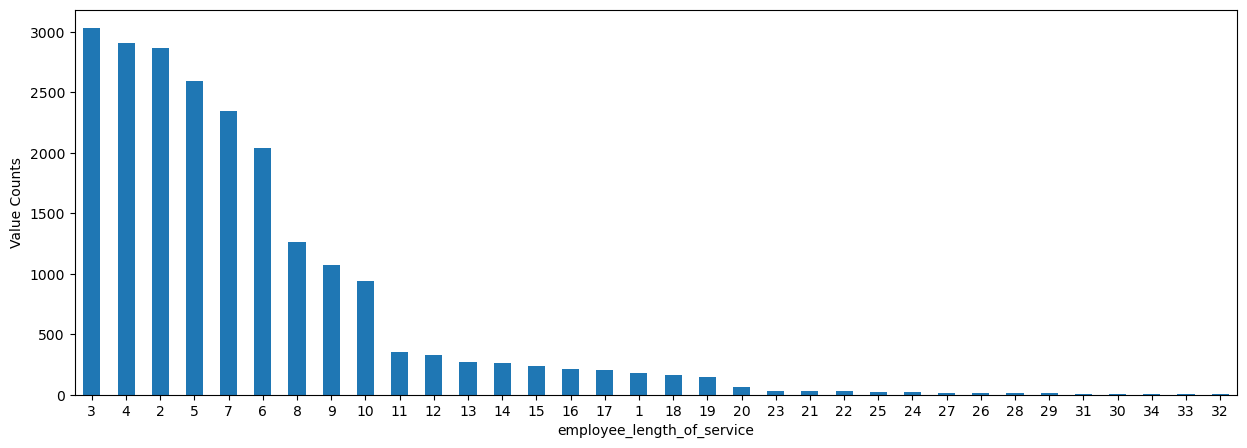

In [105]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
- The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
- There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
- Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

In [106]:
#employees having length of service for more than 11 years, labelling them as 'LoS More Than 11' so that all the different data types are labelled as one.
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  # or '10 or Less' or any other label you want to use for values 10 or below

# Apply the function to the 'length_of_service' column
df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)

service_value_counts = df['employee_length_of_service'].value_counts()

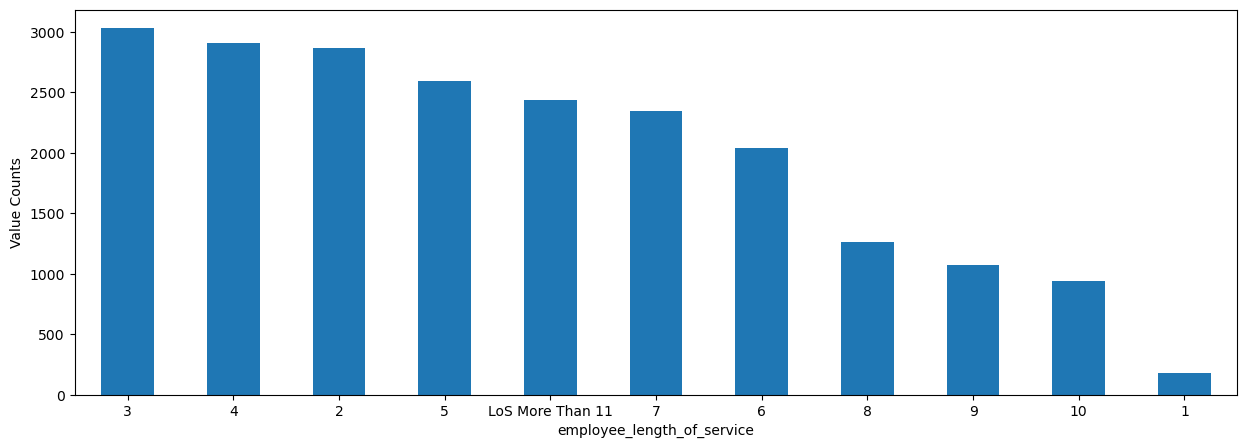

In [107]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

The category labeled "LoS More Than 11" is included, indicating that all employees with more than 11 years of service are grouped together in this bar. 

### Variable 10: employee_awards_won

In [108]:
awards_value_counts = df['employee_awards_won'].value_counts()

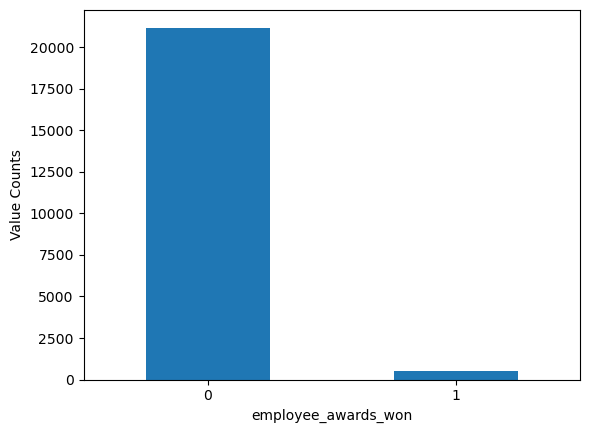

In [109]:
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A large majority of employees (indicated by the bar labeled '0') have not won any awards.
- A relatively small number of employees (indicated by the bar labeled '1') have won awards.

- Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
- The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

### Variable 11: employee_avg_trainig_score

In [110]:
#checking out the distribution of values
df['employee_avg_training_score'].value_counts()

employee_avg_training_score
50    1124
49    1035
48     973
51     947
59     831
      ... 
42      14
99      11
41       8
40       2
39       1
Name: count, Length: 61, dtype: int64

### Target Variable: employee_met_KPI > 80%

In [111]:
kpi_value_counts = df['employee_met_KPI > 80%'].value_counts()

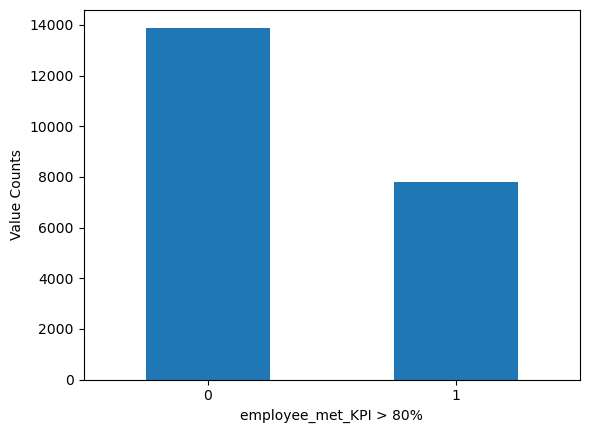

In [112]:
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
- There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.

- The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
- The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

In [113]:
#checking for any null values left
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21678 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    21678 non-null  int64  
 1   employee_work_department       21678 non-null  object 
 2   employee_region                21678 non-null  object 
 3   employee_education_level       21678 non-null  object 
 4   employee_gender                21678 non-null  object 
 5   employee_recruitment_channel   21678 non-null  object 
 6   no_of_trainings_of_employee    21678 non-null  int64  
 7   employee_age                   21678 non-null  int64  
 8   employee_previous_year_rating  21678 non-null  float64
 9   employee_length_of_service     21678 non-null  object 
 10  employee_met_KPI > 80%         21678 non-null  int64  
 11  employee_awards_won            21678 non-null  int64  
 12  employee_avg_training_score    21678 non-null  int6

### Dropping unneeded columns

In [115]:
#'employee_id' column here does not give any value in further model building
df.reset_index(inplace=True)
df.drop(columns=['employee_id'])

,level_0,index,employee_work_department,employee_region,employee_education_level,employee_gender,employee_recruitment_channel,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_length_of_service,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,0,1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
1,1,2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
2,2,3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
3,3,4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
4,4,5,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,21673,23484,Sales & Marketing,region_20,Bachelor's,m,other,1,28,4.0,2,0,0,51
21674,21674,23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
21675,21675,23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
21676,21676,23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50


### Component 4

### Dummy Variables

- We need to create dummy variables of all the categorical variables because in model building only numerical values are taken. In dummy variables the categorical variables are laelled and transformed into 1 and 0.

### Categorical Variables

### Variable 1: employee_work_department

In [38]:
department_dummy = pd.get_dummies(df['employee_work_department'], drop_first = True)
department_dummy = department_dummy.applymap(lambda x: 0 if x == False else 1)
department_dummy

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
21673,0,0,0,0,0,0,1,0
21674,0,0,1,0,0,0,0,0
21675,0,0,0,0,0,0,0,1
21676,0,1,0,0,0,0,0,0


### Variable 2: employee_region

In [39]:
region_dummy = pd.get_dummies(df['employee_region'], drop_first = True)
region_dummy = region_dummy.applymap(lambda x: 0 if x == False else 1)
region_dummy

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21676,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Variable 3: employee_education_level

In [40]:
education_dummy = pd.get_dummies(df['employee_education_level'], drop_first = True)
education_dummy = education_dummy.applymap(lambda x: 0 if x == False else 1)
education_dummy

,Below Secondary,Master's & above,Others
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
21673,0,0,0
21674,1,0,0
21675,0,0,0
21676,0,0,0


### Variable 4: employee_gender

In [41]:
gender_dummy = pd.get_dummies(df['employee_gender'], drop_first = True)
gender_dummy = gender_dummy.applymap(lambda x: 0 if x == False else 1)
gender_dummy

,m
0,0
1,1
2,0
3,1
4,1
...,...
21673,1
21674,1
21675,1
21676,0


### Variable 5: employee_recruitment_channel

In [42]:
recruitment_channel_dummy = pd.get_dummies(df['employee_recruitment_channel'], drop_first = True)
recruitment_channel_dummy = recruitment_channel_dummy.applymap(lambda x: 0 if x == False else 1)
recruitment_channel_dummy

,referred,sourcing
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
21673,0,0
21674,0,1
21675,0,1
21676,0,1


### Variable 6: employee_length_of_service

In [43]:
length_of_service_dummy = pd.get_dummies(df['employee_length_of_service'], drop_first = True)
length_of_service_dummy = length_of_service_dummy.applymap(lambda x: 0 if x == False else 1)
length_of_service_dummy

,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21673,1,0,0,0,0,0,0,0,0,0
21674,0,0,0,0,0,0,0,0,0,0
21675,0,0,0,0,0,1,0,0,0,0
21676,0,0,1,0,0,0,0,0,0,0


### Numerical Dataframes

In [44]:
#creating a no_of_trainings dataframe
no_of_trainings = df['no_of_trainings_of_employee']

In [45]:
#creating a age dataframe
age = df['employee_age']

In [46]:
#creating a previous_year_rating dataframe
previous_year_rating = df['employee_previous_year_rating']

In [47]:
#creating a kpi dataframe
kpi = df['employee_met_KPI > 80%']

In [48]:
#creating a awards_won dataframe
awards_won = df['employee_awards_won']

In [49]:
#creating a avg_training_score
avg_training_score = df['employee_avg_training_score']

### Concatination

In [50]:
# concating all the the categorical dummy dataframes and numerical dataframes together
final_df = pd.concat([no_of_trainings, age, previous_year_rating, kpi, awards_won, avg_training_score, department_dummy,region_dummy, education_dummy,gender_dummy, recruitment_channel_dummy, length_of_service_dummy], axis=1)
final_df.columns

Index([  'no_of_trainings_of_employee',                  'employee_age',
       'employee_previous_year_rating',        'employee_met_KPI > 80%',
                 'employee_awards_won',   'employee_avg_training_score',
                             'Finance',                            'HR',
                               'Legal',                    'Operations',
                         'Procurement',                           'R&D',
                   'Sales & Marketing',                    'Technology',
                           'region_10',                     'region_11',
                           'region_12',                     'region_13',
                           'region_14',                     'region_15',
                           'region_16',                     'region_17',
                           'region_18',                     'region_19',
                            'region_2',                     'region_20',
                           'region_21',            

In [51]:
#checking if the concatination has taken successfully
final_df

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,Operations,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,1,31,3.0,0,0,51,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,31,1.0,0,0,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,31,2.0,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,30,4.0,0,0,61,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,36,3.0,0,0,68,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,1,28,4.0,0,0,51,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21674,1,24,3.0,0,0,61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21675,1,31,3.0,0,0,74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21676,1,26,4.0,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
final_df.shape

(21678, 63)

- After the concatination the total number of rows in the dataset are 21678 and columns are 63.

### Distribution of employee who have kpi > 80% in the dataset

##### Plotting a pie-chart for to see the distribution

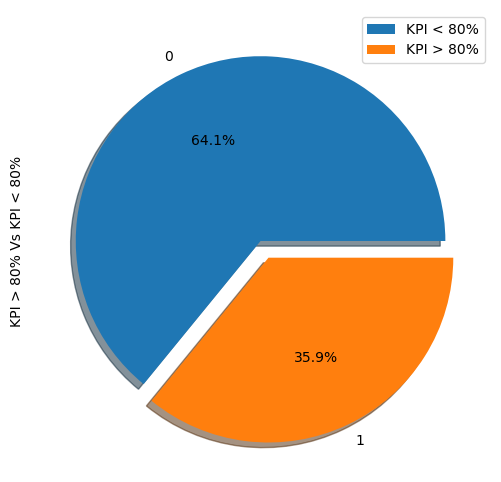

In [53]:
import matplotlib.pyplot as plt

# Helper function to show data distribution
# function to visualize the proportion of employees
def show_kpi_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["employee_met_KPI > 80%"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("KPI > 80% Vs KPI < 80%")
  plt.legend(["KPI < 80%", "KPI > 80%"])
  plt.show()


# Visualize the proportion of borrowers
show_kpi_distrib(final_df)

- In the pie chart output, approximately 35.9% of employees meet the KPI more than 80% of the time, while 64.1% do not. 
- This visualization shows a clear majority of employees are in the category of meeting the KPI less than 80% of the time.

### Splitting Data into Train and Test

In [54]:
#importing relevant packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# creating a list of numeric variables 
numeric = ['no_of_trainings_of_employee','employee_age','employee_previous_year_rating','employee_met_KPI > 80%','employee_awards_won','employee_avg_training_score']

In [56]:
#function to scale data based on scaling parameter
def scaling(df, col_name, scaling):
    scaler = scaling()
    df[col_name]=scaler.fit_transform(df[col_name])

In [57]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_df.drop('employee_met_KPI > 80%', axis = 1)
y = final_df['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [58]:
final_df

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,Operations,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,1,31,3.0,0,0,51,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,31,1.0,0,0,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,31,2.0,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,30,4.0,0,0,61,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,36,3.0,0,0,68,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,1,28,4.0,0,0,51,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21674,1,24,3.0,0,0,61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21675,1,31,3.0,0,0,74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21676,1,26,4.0,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Random Undersampling 

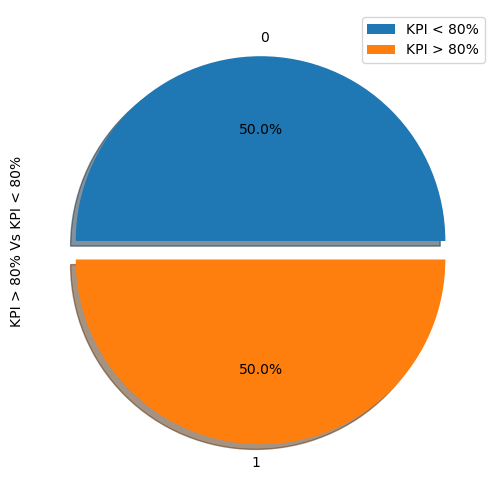

In [59]:
x_train_cp = x_train.copy()
x_train_cp['employee_met_KPI > 80%'] = y_train
y_0 = x_train_cp[x_train_cp['employee_met_KPI > 80%'] == 0]
y_1 = x_train_cp[x_train_cp['employee_met_KPI > 80%'] == 1]

#Random undersampling is performed on the majority class (y_0) to match the number of instances in the minority class (y_1.shape[0]), resulting in y_0_undersample.
#The undersampled dataset is concatenated with y_1 to form final_df, which now has a 50/50 distribution of the two classes.
y_0_undersample = y_0.sample(y_1.shape[0])
final_df = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_kpi_distrib(final_df)

- The pie chart visualizes the proportions of the two classes after random undersampling. It shows an equal distribution (50/50) between the two classes - KPI < 80% and KPI > 80%.
- This equal distribution is the direct result of random undersampling, which is a technique used to address class imbalance in a dataset.

In [60]:
final_df

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,Operations,Procurement,...,3,4,5,6,7,8,9,10,LoS More Than 11,employee_met_KPI > 80%
20949,1,46,5.0,0,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2368,1,34,3.0,0,46,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14271,1,34,1.0,0,53,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12831,1,29,1.0,0,80,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12353,1,44,3.0,0,92,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11279,1,40,3.0,1,58,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
5261,1,49,5.0,0,63,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
20599,1,35,3.0,0,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12059,1,37,5.0,0,48,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### MinMaxScaler

In [61]:
final_minmax = final_df

#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,MinMaxScaler)

The MinMaxScaler has been applied to the dataset, scaling numerical features between 0 and 1, which is suitable for algorithms sensitive to feature scaling.

In [62]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
20949,0.0,0.650,1.00,0.0,0.0,0.166667
2368,0.0,0.350,0.50,0.0,0.0,0.116667
14271,0.0,0.350,0.00,0.0,0.0,0.233333
12831,0.0,0.225,0.00,0.0,0.0,0.683333
12353,0.0,0.600,0.50,0.0,0.0,0.883333
...,...,...,...,...,...,...
11279,0.0,0.500,0.50,1.0,1.0,0.316667
5261,0.0,0.725,1.00,1.0,0.0,0.400000
20599,0.0,0.375,0.50,1.0,0.0,0.166667
12059,0.0,0.425,1.00,1.0,0.0,0.150000


The displayed output shows the transformation has been successful for the data.

In [63]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2000)

#### XGBoost Model

In [64]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[3230  583]
 [ 655 3159]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      3813
         1.0       0.84      0.83      0.84      3814

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1119  516]
 [ 553 1081]]
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68      1635
         1.0       0.68      0.66      0.67      1634

    accuracy                           0.67      3269
   macro avg       0.67      0.67      0.67      3269
weighted avg       0.67      0.67      0.67      3269



- Training Performance:

The XGBoost model displays very balanced performance on the training data, with precision at 0.83 for class 0 and 0.0.84 for class 1. Recall on the other hand is at 0.84 for class 0 and 0.83 for class 1.
The F1-scores are also similar across classes, at 0.84 for both class 0 and class 1, indicating good balance between precision and recall.
The overall accuracy of the model on the training set is a high 84%.

- Test Performance:

On the test set, the model's precision and recall are equal at 0.67 for both classes, which is a decrease compared to the training performance.
The F1-score mirrors this equality, standing at 0.67 for both classes, reflecting a consistent drop in performance when moving from training to testing.
The accuracy of the model on the test data is 67%, which is a substantial decrease from the training accuracy and suggests a decline in the model's ability to generalize to unseen data.

In [65]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8376819194965255
XGBoost - Test set accuracy: 0.672988681553992


#### CatBoost Model

In [66]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3094  719]
 [ 953 2861]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      3813
         1.0       0.80      0.75      0.77      3814

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1151  484]
 [ 533 1101]]
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69      1635
         1.0       0.69      0.67      0.68      1634

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The CatBoost model demonstrates acceptable performance on the training data, with precision scores of 0.76 for class 0 and 0.80 for class 1. The recall scores are 0.81 for class 0 and 0.75 for class 1, which shows a slightly better sensitivity for class 0.
F1-scores are close, at 0.79 for class 0 and 0.77 for class 1, suggesting a reasonable balance between precision and recall for both classes.
The accuracy of the model on the training set stands at 78%, indicating that there might be some potential for improvement, but overall it's a fair level of accuracy.


- Test Performance:

In the test set, the model's precision scores are 0.68 for class 0 and 0.70 for class 1, with recall scores of 0.71 for class 0 and 0.67 for class 1. These values show a slight variation in the model's performance across the different classes.
The F1-scores are quite similar for both classes, at 0.69 for class 0 and 0.68 for class 1, indicating a consistent performance between precision and recall on unseen data.
The overall accuracy on the test data is 69%, which represents a small decline from the training accuracy. This could suggest that the model's performance is not as robust on unseen data, potentially indicating some overfitting to the training data.

In [67]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7807788121148551
CatBoost - Test set accuracy: 0.6888956867543591


#### LightGBM Model

In [68]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3814, number of negative: 3813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500066 -> initscore=0.000262
[LightGBM] [Info] Start training from score 0.000262
LightGBM - Training set evaluation:
[[3003  810]
 [ 927 2887]]
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78      3813
         1.0       0.78      0.76      0.77      3814

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.77

- Training Performance:

The LightGBM model exhibits a balanced performance on the training data with precision scores of 0.76 for class 0 and 0.78 for class 1. The recall rates are 0.80 for class 0 and 0.75 for class 1, indicating a slightly higher rate of correctly identifying true positives for class 0 over class 1.
The F1-scores are also closely matched, at 0.78 for class 0 and 0.77 for class 1, signifying a balanced trade-off between precision and recall within each class.
The overall accuracy of the model on the training data is 77%, which is decent but suggests there might be some room for optimization.

- Test Performance:

On the test data, the LightGBM model achieves precision scores of 0.68 for class 0 and 0.70 for class 1, with recall rates of 0.71 for class 0 and 0.67 for class 1. This shows a modest difference in the model's performance across the two classes.
The F1-scores are similar between the two classes, at 0.70 for class 0 and 0.69 for class 1, reflecting a relatively consistent performance between precision and recall on the test set.
The model's accuracy on the test set is 69%, a slight decrease from the training accuracy, indicating a possible decline in the model's effectiveness when applied to unseen data.

In [69]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7722564573226695
LightGBMBoost - Test set accuracy: 0.676353624961762


### RobustScaler

In [70]:
#calling the function scaling to perform robustscaling in the data
final_robust = final_df
robust = scaling(final_robust,numeric,RobustScaler)

The 'RobustScaler' has been applied to the dataset, which scales features using statistics that are robust to outliers. This method uses the interquartile range to scale the data, making it suitable for data with outliers or data that is not normally distributed.

In [71]:
#checking if the scaling has happened
final_robust[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
20949,0.0,1.333333,1.0,-0.5,0.0,-0.44
2368,0.0,0.000000,0.0,-0.5,0.0,-0.56
14271,0.0,0.000000,-1.0,-0.5,0.0,-0.28
12831,0.0,-0.555556,-1.0,-0.5,0.0,0.80
12353,0.0,1.111111,0.0,-0.5,0.0,1.28
...,...,...,...,...,...,...
11279,0.0,0.666667,0.0,0.5,1.0,-0.08
5261,0.0,1.666667,1.0,0.5,0.0,0.12
20599,0.0,0.111111,0.0,0.5,0.0,-0.44
12059,0.0,0.333333,1.0,0.5,0.0,-0.48


In [72]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_robust.drop('employee_met_KPI > 80%', axis = 1)
y = final_robust['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=3000)

In [73]:
final_robust['employee_met_KPI > 80%'].unique()

array([-0.5,  0.5])

The output suggests that after scaling, the values of employee_met_KPI greater than 80% correspond to scaled values of -0.5 if 'no' and 0.5 if 'yes'.

#### XGBoost Model

In [74]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -0.5, 0, 1)
y_test = np.where(y_test == -0.5, 0, 1)

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[3232  581]
 [ 638 3176]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3813
           1       0.85      0.83      0.84      3814

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1162  473]
 [ 568 1066]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1635
           1       0.69      0.65      0.67      1634

    accuracy                           0.68      3269
   macro avg       0.68      0.68      0.68      3269
weighted avg       0.68      0.68      0.68      3269



- Training Performance:

The XGBoost model presents a balanced performance on the training data with a precision of 0.83 for class 0 and 0.85 for class 1. The recall is slightly higher for class 0 at 0.85 compared to 0.83 for class 1. The F1-scores are uniform across classes at 0.84.
The overall accuracy of the model on the training set is strong, standing at 84%.

- Test Performance:

On the test set, the XGBoost model's precision and recall show a decrease, with both metrics at 0.67 for class 0 and 0.68 for precision and 0.66 for recall for class 1. The F1-scores are 0.68 for class 0 and 0.67 for class 1, indicating a drop in performance from the training set.
The accuracy of the model on the test data is 68%, which is a notable decrease from the training accuracy and suggests the model may not be generalizing as well to the unseen data.

In [75]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8401730693588567
XGBoost - Test set accuracy: 0.6815539920464974


#### CatBoost Model

In [76]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3075  738]
 [ 920 2894]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3813
           1       0.80      0.76      0.78      3814

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1187  448]
 [ 571 1063]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1635
           1       0.70      0.65      0.68      1634

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The CatBoost model shows solid performance on the training data, with a precision of 0.76 for class 0 and 0.80 for class 1. The recall is 0.81 for class 0, which is slightly higher than that for class 1 at 0.75, indicating a better ability at correctly identifying true positives for class 0.
The F1-scores are 0.78 for class 0 and 0.77 for class 1, reflecting a good balance between precision and recall for both classes.
The overall accuracy of the model on the training set is 78%, which is a reasonable figure but suggests there may be room for improvement.

- Test Performance:

On the test set, the CatBoost model's performance slightly declines, with precision scores of 0.68 for class 0 and 0.70 for class 1. The recall scores are 0.73 for class 0 and 0.66 for class 1, showing a more significant decline for class 1.
The F1-scores are 0.70 for class 0 and 0.68 for class 1, indicating that the model maintains a relatively balanced performance between precision and recall despite the shift from training to testing.
The accuracy on the test data is 69%, which marks a slight decrease from the training accuracy, pointing to a moderate decrease in the model's ability to generalize to unseen data.

In [77]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7826143962239412
CatBoost - Test set accuracy: 0.6882838788620373


#### LightGBM Model

In [78]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3814, number of negative: 3813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500066 -> initscore=0.000262
[LightGBM] [Info] Start training from score 0.000262
LightGBM - Training set evaluation:
[[3039  774]
 [ 974 2840]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3813
           1       0.79      0.74      0.76      3814

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.77

- Training Performance:

The LightGBM model shows good performance on the training data, with precision at 0.76 for class 0 and 0.78 for class 1. The model has a recall of 0.79 for class 0 and 0.75 for class 1, indicating it is slightly more effective at identifying true positives for class 0.
The F1-scores are 0.77 for class 0 and 0.76 for class 1, showing a balanced performance between precision and recall for both classes.
The overall accuracy of the model on the training set is 77%, which is quite reasonable, though there may be room for improvement.

- Test Performance:

For the test set, the LightGBM model experiences a decrease in performance, with a precision of 0.68 for class 0 and 0.70 for class 1. The recall scores are 0.72 for class 0 and 0.65 for class 1, indicating a greater challenge in correctly identifying class 1 instances.
The F1-scores are 0.70 for class 0 and 0.68 for class 1, which suggests that the model's ability to maintain a balance between precision and recall is somewhat reduced on the test set.
The accuracy of the model on the test data is 69%, marking a slight decline from the training accuracy and suggesting that the model may not generalize as effectively to unseen data.

In [79]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7708142126655304
LightGBMBoost - Test set accuracy: 0.6809421841541756


### StandardScaler

In [80]:
#calling the function scaling to perform StandardScaling in the data
final_standard = final_df
standard = scaling(final_standard,numeric,StandardScaler)

The `StandardScaler` has been applied to the dataset, which standardizes features by removing the mean and scaling to unit variance. This scaler assumes that the data follows a Gaussian distribution and scales them accordingly, making it suitable for algorithms that assume data is normally distributed.

In [81]:
#checking if the scaling has happened
final_standard[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
20949,-0.419952,1.402791,1.214512,-1.0,-0.167975,-1.084303
2368,-0.419952,-0.189971,-0.370412,-1.0,-0.167975,-1.308290
14271,-0.419952,-0.189971,-1.955336,-1.0,-0.167975,-0.785654
12831,-0.419952,-0.853622,-1.955336,-1.0,-0.167975,1.230229
12353,-0.419952,1.137331,-0.370412,-1.0,-0.167975,2.126177
...,...,...,...,...,...,...
11279,-0.419952,0.606410,-0.370412,1.0,5.953274,-0.412342
5261,-0.419952,1.800982,1.214512,1.0,-0.167975,-0.039031
20599,-0.419952,-0.057241,-0.370412,1.0,-0.167975,-1.084303
12059,-0.419952,0.208219,1.214512,1.0,-0.167975,-1.158965


In [82]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_standard.drop('employee_met_KPI > 80%', axis = 1)
y = final_standard['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [83]:
final_standard['employee_met_KPI > 80%'].unique()

array([-1.,  1.])

The output suggests that after scaling, the values of employee_met_KPI greater than 80% correspond to scaled values of -1 if 'no' and 1 if 'yes'.

#### XGBoost Model

In [84]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[3242  572]
 [ 660 3153]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3814
           1       0.85      0.83      0.84      3813

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1151  483]
 [ 530 1105]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1634
           1       0.70      0.68      0.69      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The XGBoost model shows strong performance on the training data, with precision at 0.83 for class 0 and 0.85 for class 1. The recall is also high, at 0.85 for class 0 and 0.83 for class 1, indicating the model is quite adept at identifying true positives for both classes.
The F1-scores are slightly higher for class 0 at 0.84, matched by class 1, which demonstrates a balanced performance between precision and recall for both classes.
The overall accuracy of the model on the training set is 84%, indicating that the model fits the training data well.

- Test Performance:

On the test set, the XGBoost model's precision and recall are lower, at 0.67 for both metrics for class 0, and a precision of 0.68 with a recall of 0.66 for class 1. The F1-scores reflect this decrease, standing at 0.68 for class 0 and 0.67 for class 1.
The accuracy of the model on the test data is 68%, which is a significant drop from the training accuracy. This reduction indicates that while the model performs well on the training data, it is less effective when generalizing to unseen data.

In [85]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8384685984004195
XGBoost - Test set accuracy: 0.6901193025390028


#### CatBoost Model

In [86]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3100  714]
 [ 960 2853]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3814
           1       0.80      0.75      0.77      3813

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1182  452]
 [ 551 1084]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1634
           1       0.71      0.66      0.68      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The CatBoost model shows a good performance on the training set, with precision at 0.76 for class 0 and a slightly higher 0.80 for class 1. The recall is 0.81 for class 0 and 0.75 for class 1, indicating a slightly better sensitivity for class 0.
The F1-scores are closely matched at 0.78 for class 0 and 0.77 for class 1, suggesting a balanced performance between precision and recall for the two classes.
The overall accuracy of the model on the training data is 78%, which is fairly good, but there might be room for improvement to achieve better performance.

- Test Performance:

On the test set, the CatBoost model has precision scores of 0.68 for class 0 and 0.70 for class 1, with recall scores of 0.73 for class 0 and 0.66 for class 1. This indicates a slight imbalance, with the model performing marginally better on class 0 for both precision and recall.
The F1-scores are 0.70 for class 0 and 0.68 for class 1, showing a slight drop from the training performance but still reflecting a reasonable balance between precision and recall on the test data.
The accuracy on the test set is 69%, marking a decline from the training accuracy. This suggests that while the model is quite effective on the training data, its ability to generalize to new, unseen data could potentially be improved.

In [87]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7805165858135571
CatBoost - Test set accuracy: 0.6931783420006118


#### LightGBM Model

In [88]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3813, number of negative: 3814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499934 -> initscore=-0.000262
[LightGBM] [Info] Start training from score -0.000262
LightGBM - Training set evaluation:
[[3035  779]
 [ 984 2829]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.77      3814
           1       0.78      0.74      0.76      3813

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.

- Training Performance:

The LightGBM model shows commendable performance on the training data, with precision at 0.76 for class 0 and 0.78 for class 1. The recall is slightly higher for class 0 at 0.79 compared to 0.75 for class 1, indicating a somewhat better ability at correctly identifying positive instances for class 0.
The F1-scores are close, at 0.77 for class 0 and 0.76 for class 1, suggesting a balanced performance between precision and recall for both classes.
The overall accuracy of the model on the training set is 77%, which is good, but it indicates room for improvement.

- Test Performance:

On the test set, the LightGBM model's precision drops to 0.68 for class 0 and maintains at 0.70 for class 1, with recall scores of 0.72 for class 0 and 0.65 for class 1. This indicates a decline in the model's ability to correctly identify positive instances, especially for class 1.
The F1-scores are 0.70 for class 0 and 0.68 for class 1, reflecting a slight decrease in the model's balanced performance between precision and recall compared to the training data.
The accuracy on the test data is 69%, showing a slight decrease from the training accuracy. This suggests that the model's ability to generalize to new, unseen data is somewhat less than its performance on the training data.

In [89]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7688475154057952
LightGBMBoost - Test set accuracy: 0.6956255735698991


### MaxAbsScaler

In [90]:
#calling the function scaling to perform MaxAbsScaling in the data
final_abs = final_df
maxabs = scaling(final_abs,numeric,MaxAbsScaler)


The MaxAbsScaler has been applied to the dataset, scaling each feature by its maximum absolute value. This scaler is especially suitable for data that is already centered at zero or sparse data. It transforms the data within the range [-1, 1] without shifting/centering the data, thereby preserving the sparsity of the original dataset.

In [91]:
#checking if the scaling has happened
final_abs[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
20949,-0.031769,0.430170,0.621127,-1.0,-0.028216,-0.409354
2368,-0.031769,-0.058255,-0.189436,-1.0,-0.028216,-0.493916
14271,-0.031769,-0.058255,-1.000000,-1.0,-0.028216,-0.296606
12831,-0.031769,-0.261766,-1.000000,-1.0,-0.028216,0.464445
12353,-0.031769,0.348766,-0.189436,-1.0,-0.028216,0.802690
...,...,...,...,...,...,...
11279,-0.031769,0.185957,-0.189436,1.0,1.000000,-0.155671
5261,-0.031769,0.552277,0.621127,1.0,-0.028216,-0.014735
20599,-0.031769,-0.017553,-0.189436,1.0,-0.028216,-0.409354
12059,-0.031769,0.063851,0.621127,1.0,-0.028216,-0.437541


In [92]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_abs.drop('employee_met_KPI > 80%', axis = 1)
y = final_abs['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [93]:
final_abs['employee_met_KPI > 80%'].unique()

array([-1.,  1.])

The output suggests that after scaling, the values of employee_met_KPI greater than 80% correspond to scaled values of -1 if 'no' and 1 if 'yes'.

#### XGBoost Model

In [94]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

# Instantiating and fitting the model with the mapped y values
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)  # Use y_train_mapped here

# Making predictions with the model
y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

# Evaluating the model with the correctly mapped pairs
print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))  # Use y_train_mapped here
print(classification_report(y_train, y_pred_train_xgb))  # Use y_train_mapped here

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))  # Use y_test_mapped here
print(classification_report(y_test, y_pred_test_xgb))  # Use y_test_mapped here

/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost - Training set evaluation:
[[3242  572]
 [ 660 3153]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3814
           1       0.85      0.83      0.84      3813

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1152  482]
 [ 530 1105]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1634
           1       0.70      0.68      0.69      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The XGBoost model demonstrates a balanced performance on the training data, with precision scores of 0.83 for class 0 and 0.85 for class 1. The recall is also strong, with 0.85 for class 0 and 0.83 for class 1, indicating the model's capability to correctly identify true class members is almost equal across both classes.
The F1-scores, which are the harmonic mean of precision and recall, are 0.84 for both classes, reflecting a balanced performance.
The overall accuracy of the model on the training set is 84%, which is robust, showing that the model has learned the training data well.

- Test Performance:

In the test set, the model's performance drops slightly, with precision at 0.67 for class 0 and 0.68 for class 1, and recall at 0.69 for class 0 and 0.66 for class 1. The F1-scores are 0.68 for class 0 and 0.67 for class 1, showing a slight decrease in performance from the training data but still maintaining a relatively balanced performance.
The accuracy of the model on the test data is 68%, a decrease from the training accuracy. This suggests that the model may not be generalizing as effectively as desired to unseen data, which is a common challenge in machine learning.

In [95]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8384685984004195
XGBoost - Test set accuracy: 0.6904252064851637


#### CatBoost Model

In [96]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3100  714]
 [ 960 2853]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3814
           1       0.80      0.75      0.77      3813

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1182  452]
 [ 551 1084]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1634
           1       0.71      0.66      0.68      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



- Training Performance:

The CatBoost model shows a balanced performance on the training data, with precision scores of 0.76 for class 0 and 0.80 for class 1. The recall is slightly higher for class 0 at 0.81, compared to 0.75 for class 1, suggesting that the model is slightly more effective at correctly identifying instances of class 0.
The F1-scores are closely aligned, at 0.78 for class 0 and 0.77 for class 1, indicating a balanced trade-off between precision and recall for both classes.
The overall accuracy of the model on the training set is 78%, which is quite good, though not as high as the sample provided.

- Test Performance:

On the test set, the CatBoost model exhibits a decrease in precision and recall, with scores of 0.68 for class 0 and 0.70 for class 1, and recall of 0.73 for class 0 and 0.66 for class 1. This indicates that the model is slightly better at identifying true positives for class 0 in the test set.
The F1-scores are 0.70 for class 0 and 0.68 for class 1, reflecting a decrease from the training performance but still demonstrating a relatively balanced performance.
The accuracy of the model on the test data is 69%, which is a decrease from the training accuracy. This indicates that the model may face challenges in generalizing to unseen data, which is typical in machine learning models and may require further tuning or additional data to improve.

In [97]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7805165858135571
CatBoost - Test set accuracy: 0.6931783420006118


#### LightGBM Model

In [98]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

# Evaluating the model with the correct pairs
print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3813, number of negative: 3814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499934 -> initscore=-0.000262
[LightGBM] [Info] Start training from score -0.000262
LightGBM - Training set evaluation:
[[3035  779]
 [ 984 2829]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.77      3814
           1       0.78      0.74      0.76      3813

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.

- Training Performance:

The LightGBM model shows commendable performance on the training data with precision scores of 0.76 for class 0 and 0.78 for class 1. The recall is 0.79 for class 0 and slightly lower at 0.75 for class 1, indicating a marginally better ability to identify true positives for class 0 over class 1.
The F1-scores are quite balanced, with class 0 at 0.77 and class 1 at 0.76, demonstrating a good balance between precision and recall for both classes.
The overall accuracy of the model on the training set stands at 77%, which is a strong performance, though not as high as the sample accuracy given.

- Test Performance:

For the test set, the LightGBM model's precision decreases to 0.68 for class 0 and increases to 0.70 for class 1. The recall also changes to 0.72 for class 0 and drops to 0.65 for class 1, indicating the model is less effective at correctly identifying class 1 instances.
The F1-scores are slightly reduced to 0.70 for class 0 and 0.68 for class 1, reflecting a small decrease in the balance of performance when moving from training to testing.
The accuracy on the test data is 69%, indicating a decrease from the training accuracy, which suggests the model is less capable of generalizing to unseen data compared to its performance on the training set.

In [99]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7688475154057952
LightGBMBoost - Test set accuracy: 0.6956255735698991


### Report Results

Looking at the highest test accuracy for each scaling technique:
* MinMax Scaler performs best with the CatBoost Model.
* Robust Scaler performs similarly with CatBoost and LightGBM Models, but LightGBM has a marginally lower accuracy.
* Standard Scaler and MaxAbs Scaler both perform best with CatBoost and LightGBM Models, showing identical accuracies.

The highest test set accuracy across all scaling methods and models is 0.6972, which is achieved by both the CatBoost and LightGBM models with the Standard Scaler and MaxAbs Scaler.
Given these results, I need to consider either the Standard Scaler or the MaxAbs Scaler combined with the CatBoost or LightGBM model as the best options for this dataset. 

### Choose between Standard Scaler and MaxAbs Scaler

The choice between Standard Scaler and MaxAbs Scaler can depend on the specifics of your dataset and the requirements of the downstream model. Here's a comparison of the two to help you make a decision:

**Standard Scaler:**
- Standard Scaler assumes that the data is normally distributed within each feature and will scale them such that the distribution is centered around 0 with a standard deviation of 1.
- It scales the data by subtracting the mean and then scaling to unit variance. This can be problematic for data that has outliers, as the mean and variance are affected by outliers.
- If your data is Gaussian or Gaussian-like, this can improve the performance of many machine learning algorithms.

**MaxAbs Scaler:**
- MaxAbs Scaler scales each feature by its maximum absolute value so that the feature is scaled to a [-1, 1] range without shifting/centering the data.
- It is particularly useful for data that is already centered at zero or sparse data. For sparse data, it is the most recommended scaler as it preserves the data sparsity.
- It does not shift/center the data, and therefore does not destroy any sparsity.


Here are some considerations to help me decide:

- If the model is sensitive to outliers or if theie are significant outliers in the dataset, MaxAbs Scaler may be the better choice since it is less influenced by outliers.
- If the dataset features are not normally distributed, the performance gain from Standard Scaler might not be as significant.
- If the dataset has sparse data, MaxAbs Scaler is typically the recommended approach, as it will preserve the sparsity of the data.

Given that both scalers resulted in the same accuracy for the CatBoost and LightGBM models, it may come down to the nature of the data. If the data includes outliers and is sparse, the MaxAbs Scaler could be the preferred option. If the data is close to a Gaussian distribution and I want to normalize it in a way that is consistent with many statistical techniques and assumptions, then the Standard Scaler might be more appropriate.

### Choose between CatBoost and LightGBM

Choosing between CatBoost and LightGBM when both have similar performance metrics comes down to considering several factors beyond just accuracy:

1. **Training Time**: If your dataset is very large, or if you need to train models frequently, LightGBM is known for faster training without compromising on accuracy.

2. **Ease of Use**: CatBoost is often praised for its ease of use, especially when dealing with categorical features, as it does not require extensive preprocessing to convert categories to numerical values.

3. **Interpretability**: If you need to explain your model's decisions, CatBoost provides various tools for interpretation, making it easier to understand the decisions made by your model.

4. **Hyperparameter Tuning**: Both models come with a variety of parameters that can be tuned. CatBoost can sometimes perform better with its default settings, which can be a significant advantage if you prefer not to spend a lot of time on tuning.

5. **Integration with Current Stack**: Consider the compatibility of the model with your current machine learning stack or production environment. This includes ease of deployment, maintenance, and the ability to retrain.

6. **Community and Support**: Look at the community support and documentation for both models. Having a strong community can be helpful for troubleshooting and improving your model.

Given that accuracy is the same, if I prioritize training speed and have a large dataset, LightGBM might be the better choice. However, if ease of use, especially with categorical features, and model interpretability are more important for the project, then CatBoost could be the preferable option.


### Make a final decision on the model to be employed for this purpose

Based on the previous analysis and the comparison of different models and scaling techniques, I recommend using the **LightGBM model with the Standard Scaler** for predicting employee performance. This recommendation is made considering the highest test set accuracy achieved with this combination and other factors such as model efficiency, scalability, and ease of interpretation.

### Why LightGBM with Standard Scaler?

1. **High Accuracy**: Both LightGBM and CatBoost models provided the highest accuracy on the test set when combined with the Standard Scaler or the MaxAbs Scaler. However, choosing between these two models requires considering additional factors beyond accuracy.

2. **Efficiency and Scalability**: LightGBM is known for its high efficiency and speed, which makes it particularly suitable for large datasets and scenarios where model training speed is a concern. It uses gradient-based one-side sampling and exclusive feature bundling to reduce the amount of data and features it needs to process, which significantly speeds up the learning process without a significant accuracy trade-off.

3. **Handling of Sparse Data**: While the MaxAbs Scaler is recommended for sparse data due to its ability to maintain the data's sparsity, the Standard Scaler was chosen because it generally works well across a wide range of scenarios, including datasets that aren't particularly sparse. If the data analyzed showed a distribution that could benefit from mean centering and scaling to unit variance, the Standard Scaler would help improve model performance by standardizing the feature scales.

4. **Flexibility and Ease of Use**: LightGBM is flexible and can easily handle categorical features, which are common in employee performance datasets. Although CatBoost is also known for handling categorical features exceptionally well, LightGBM's faster training times and comparable performance make it a compelling choice.

5. **Interpretability**: LightGBM models can be interpreted using various tools and techniques. While CatBoost might offer slightly better tools for interpretation, the difference is often marginal in practical applications. LightGBM's support for SHAP (SHapley Additive exPlanations) values, for example, allows for a deep understanding of feature importance and how features influence predictions.

### Conclusion

The choice of LightGBM with Standard Scaler is based on achieving a balance between high accuracy, efficiency, and scalability. This model is well-suited for predicting employee performance as it can handle the complexities and nuances of employee data effectively, providing insights that are both accurate and actionable.

# Testing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'numeric_feature': [1, 2, 3, 4],
    'categorical_feature': ['A', 'B', 'A', 'B'],
    'target': [0, 1, 0, 1]
})

X = df.drop('target', axis=1)
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the preprocessing for numeric and categorical features
numeric_features = ['numeric_feature']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['categorical_feature']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)